<h1>O11 - Polarisation</h1>
<p>Simon Legtenborg, Leonie Parsiegel</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

<h2>Aufgabe 0</h2>

<h4>Für die Jones Vektoren gilt</h4>
<p>
a) für linear polarisiertes Licht<br>
$\overrightarrow{J_x} = \begin{pmatrix}1\\0\end{pmatrix}$ (horizontal)<br>
$\overrightarrow{J_y} = \begin{pmatrix}0\\1\end{pmatrix}$ (vertikal)<br>
$\overrightarrow{J_\alpha} = \begin{pmatrix}\sin(\alpha)\\\cos(\alpha)\end{pmatrix}$ (beliebig)<br>
b) für zirkular polarisiertes Licht<br>
$\overrightarrow{J_+} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1\\-i\end{pmatrix}$ (rechts-zirkulär)<br>
$\overrightarrow{J_-} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1\\+i\end{pmatrix}$ (rechts-zirkulär)<br>
</p>

<h4>Für die Jones Matrizen erhalten wir</h4>
<p>
    $\begin{pmatrix}
    \sin^2(\phi) &\sin(\phi)\cos(\phi)  \\
    \sin(\phi) &\cos^2(\phi) 1
    \end{pmatrix}$ - Linearpolarisator<br>
    </p>

<p>
    $\dfrac{1}{\sqrt{2}}
    \begin{pmatrix}
    1+i \cos(2\phi) &-i \sin(2 \phi)  \\
    -i \cos(2\phi)  &1-i \cos(2 \phi)
    \end{pmatrix}$ - $\lambda$/4 Plättchen
    </p>

<h3>a) linear polarisiertes Licht</h3>

$I \propto \left| M_\theta  \overrightarrow{J_\alpha}\right|= \left| 
\begin{pmatrix} 
\sin(\alpha)\sin^2(\theta)+ \cos(\alpha)\sin(\theta)\cos(\theta)\\
\cos(\alpha)\cos^2(\theta)+\sin(\alpha)\sin(\theta)\cos(\theta)
\end{pmatrix} \right| = \cos(\alpha-\theta)^2 \\
I = I_0 \cdot \cos(\alpha-\theta)^2$

<h3>b) zirkular polarisiertes Licht</h3>

$I \propto \left| M_\theta \overrightarrow{J_-} \right| = \left| 
\dfrac{1}{\sqrt{2}}
\begin{pmatrix}
\sin^2(\theta)+\sin\theta\cos\theta \cdot i \\
\sin\theta\cos\theta+\cos^2\theta \cdot i
\end{pmatrix} \right|^2
= \dfrac{1}{2}(\sin^4\theta+2\sin^2\theta\cos^2\theta+cos^4\theta)= \dfrac{1}{2}(\sin^2\theta+\cos^2\theta)^2=\dfrac{1}{2} \\
I = \dfrac{I_0}{2}
$



<h3>c) linear polarisiertes Licht, welches durch ein $\lambda/4$ Plättchen läuft</h3>

$I \propto \left| M_\theta M_{\lambda/4}^\phi J_\alpha \right| ^2
= \left|\dfrac{1}{\sqrt{2}} \cdot 
\begin{pmatrix} 
(\cos(\alpha+\theta-2\phi)+i \cos(\alpha-\theta))*(-i \sin\theta)\\
(\cos(\alpha+\theta-2\phi)+i \cos(\alpha-\theta))*(-i \cos\theta)
\end{pmatrix} \right|^2\\
=\dfrac{1}{2} \left| \cos(\alpha+\theta-2\phi)+i \cos(\alpha-\theta) \right|^2
\cdot \left| \begin{pmatrix}
-i \sin\theta \\
-i \cos\theta
\end{pmatrix} \right|^2$

$I = \dfrac{I_0}{2} \cdot (\cos^2(\alpha+\theta-2\phi)+\cos^2(\alpha-\theta))$

<h3>d) zirkular polarisiertes Licht, welches durch ein $\lambda/4$ Plättchen läuft</h3>

$
I \propto \left| M_\theta M_{\lambda/4}^\phi J_- \right|^2
= \dfrac{1}{4} \cdot \left| (1+i)(\cos\phi-i \sin\phi)*(\sin(\theta-\phi)+\cos(\theta-\phi)) \right|^2 \cdot 
\left|\begin{pmatrix}
\sin \theta \\
\cos \theta
\end{pmatrix}\right|^2\\
I= \dfrac{I_0}{4}\cdot (2\sin(2 \theta-2 \phi)+1)
$

<h2>Aufgabe 2</h2>
$\varphi$ wird als $\phi$ und $\theta$ als $\Theta$ geplottet, da Matplotlib anscheinend sonst Probleme damit hat.

<h3>$\phi=0$</h3>

In [2]:
#Daten importieren
DF1 = pd.DataFrame()
DF1 = pd.read_csv("a0.csv", delimiter=";")
theta = DF1["theta"].to_numpy()/360*(2*np.pi)
u1 = DF1["u"].to_numpy()
x = np.linspace(-1.5,1.5,100)

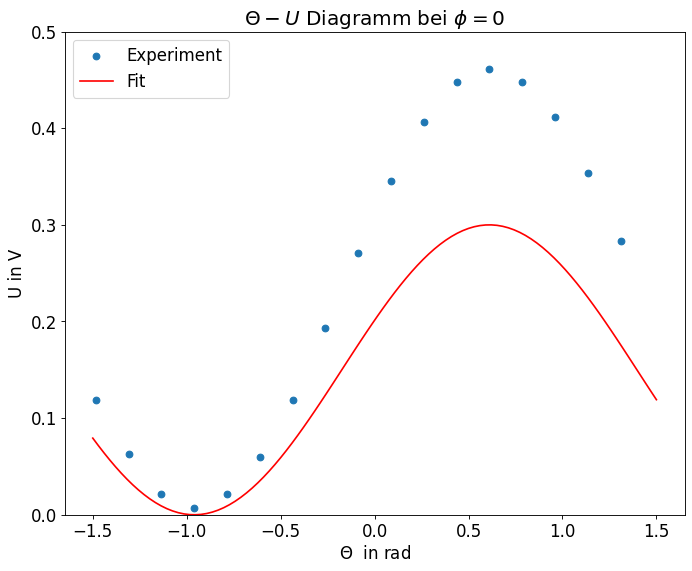

In [10]:
#Daten plotten und fitten

def linPlot(theta, I_o, alpha, phi):
    return I_o/2*(np.cos(alpha+theta-2*phi)**2+np.cos(alpha-theta)**2)

s1, cov1 = curve_fit(linPlot, theta, u1, p0=[0.3,35/360*2*np.pi,35/360*2*np.pi])

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.scatter(theta, u1, label="Experimen")
plt.plot(x, linPlot(x, s1[0], s1[1] ,s1[2]), label="Fit", color="red")
plt.title("$\Theta-U$ Diagramm bei $\phi=0$")
plt.xlabel("$\Theta$  in rad")
plt.ylabel("U in V")
plt.ylim(0,0.5)
plt.legend()
plt.show()

In [4]:
#Ergebnisse ausgeben
alpha=35
phi=np.round(s1[2]/(2*np.pi)*360,1)
print(f"phi={np.round(alpha-phi,2)}°")

phi=0.0°


In [5]:
#Daten importieren
DF2 = pd.DataFrame()
DF2 = pd.read_csv("a1.csv", delimiter=";")
theta2 = DF2["theta"].to_numpy()/360*(2*np.pi)
u2 = DF2["u"].to_numpy()

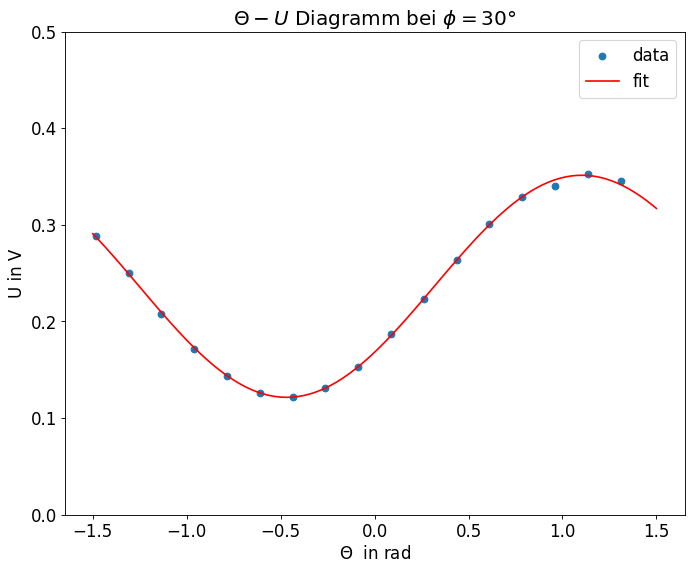

In [6]:
s2, cov2 = curve_fit(linPlot, theta2, u2, p0=[0.3,35/360*2*np.pi,35/360*2*np.pi])

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.scatter(theta2, u2, label="data")
plt.plot(x, linPlot(x, s2[0], s2[1] ,s2[2]), label="fit", color="red")
plt.title("$\Theta-U$ Diagramm bei $\phi=30°$")
plt.xlabel("$\Theta$  in rad")
plt.ylabel("U in V")
plt.ylim(0,0.5)
plt.legend()
plt.show()

In [7]:
#Daten ausgeben
phi2=np.round(s2[2]/(2*np.pi)*360,1)
print(f"phi={np.round(phi2-alpha,1)}")

phi=28.2


In [8]:
#Daten importieren
DF3 = pd.DataFrame()
DF3 = pd.read_csv("a3.csv", delimiter=";")
theta3 = DF3["theta"].to_numpy()/360*(2*np.pi)
u3 = DF3["u"].to_numpy()

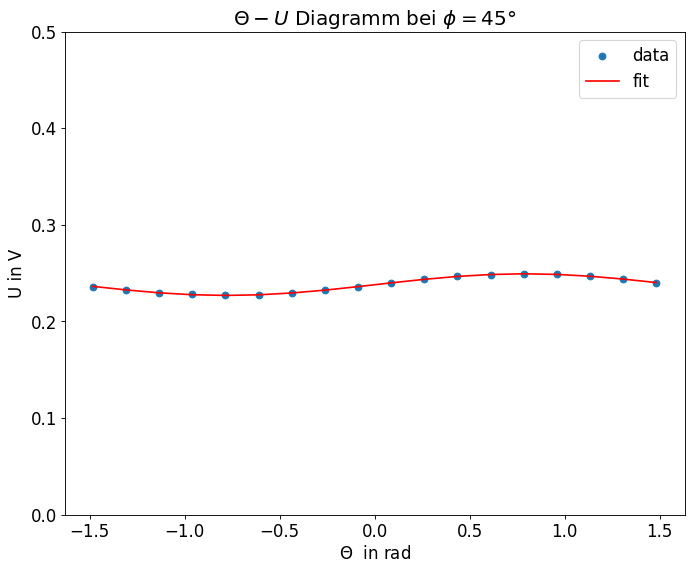

In [9]:
#Daten plotten und fitten
def linPlot3(theta, I_o, alpha, phi):
    return I_o/2*(np.cos(alpha+theta-2*phi)**2+np.cos(alpha-theta)**2)
s3, cov3 = curve_fit(linPlot3, theta3, u3, p0=[0.3,30/360*2*np.pi,100/360*2*np.pi])

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.scatter(theta3, u3, label="data")
plt.plot(theta3, linPlot3(theta3, s3[0], s3[1],s3[2]), label="fit", color="red")
plt.title("$\Theta-U$ Diagramm bei $\phi=45°$")
plt.xlabel("$\Theta$  in rad")
plt.ylabel("U in V")
plt.ylim(0,0.5)
plt.legend()
plt.show()

<h2>Aufgabe 3</h2>
Um den Polarisationszustand der Blackboxen zu ermitteln, verwenden wir das im Skript beschriebene Schema. 

<h4>BBA1</h4>
Ohne $\lambda/4$ Plättchen ergibt sich eine Intensitätsvariation, wobei die Intensität nicht vollkommen verschwindet. Nach Einbringen des $\lambda/4$ Plättchens bleibt die Intensität erhalten. Das Minimum stimmt mit oder ohne $\lambda/4$ Plättchen überein. Somit handelt es sich um eine <i>Überlagerung von linear polarisiertem und unpolarisiertem Licht</i>.

<h4>BBA2</h4>
Ohne $\lambda/4$ Plättchen ergibt sich eine Intensitätsvariation, wobei die Intensität vollkommen verschwindet. Es handelt sich also um <i>linear polarisiertes Licht</i>.Der E-Feld-Vektor schwingt in einem Winkel von -30° mit der Horizontalen

<h4>BBA3</h4>
Ohne $\lambda/4$ Plättchen ergibt sich eine Intensitätsvariation, wobei die Intensität nicht vollkommen verschwindet. Nach Einbringen des $\lambda/4$ Plättchens verschwindet die Intensität. Es handelt sich also um <i>elliptisch polarisiertes Licht</i>.